In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


# Загрузка данных из CSV-файла in df = DataFrame

def choose_file():
    filename = input("Введите имя CSV файла: ")
    while not os.path.isfile(filename):
        filename = input("Файл не найден. Повторите ввод: ")
    return filename

# Загрузка данных
filename = choose_file()
df = pd.read_csv(filename)

#df = pd.read_csv("student_scores.csv")

# Присвоение названий столбцам
def choose_columns(data):
    columns = list(data.columns)
    while True:
        x_column = input("Введите имя столбца X: ")
        if x_column in columns:
            break
        else:
            print("Столбец не найден.")

    while True:
        y_column = input("Введите имя столбца Y: ")
        if y_column in columns and y_column != x_column:
            break
        else:
            print("Столбец не найден или совпадает с X.")

    return x_column, y_column

x_column, y_column = choose_columns(df)

print(df)

# Количество строк
print(f"Количество строк: {df.shape[0]}")

# Проверка информации о DataFrame
print(df.info())

# Вывод первых пяти строк
print(df.head())


Введите имя CSV файла: student_scores.csv
Введите имя столбца X: Hours
Введите имя столбца Y: Scores
    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86
Количество строк: 25
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None
   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      3

In [26]:
#Вывод статистики столбцов (количество строк, среднее значение, минимум, максимум и остальное)
print("\nDescriptive statistics of whole dataframe:\n")
stats = df.describe(include='all')
print(stats)


Descriptive statistics of whole dataframe:

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


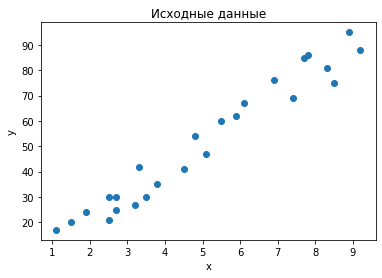

In [27]:
# Выбираем данные со столбцов
x_data = df[x_column]
y_data = df[y_column]
# Отрисовка точек
plt.scatter(x_data, y_data)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Исходные данные")
plt.show()

In [28]:
def least_squares(x_data, y_data):
    # Вычисление коэффициентов
    n = len(x_data)
    sum_x = sum(x_data)
    sum_y = sum(y_data)
    sum_xy = sum(x * y for x, y in zip(x_data, y_data))
    sum_x2 = sum(x * x for x in x_data)

    b = (sum_xy - sum_x * sum_y / n) / (sum_x2 - sum_x ** 2 / n)
    a = (sum_y / n) - b * (sum_x / n)

    return a, b

# Вычисление параметров
a, b = least_squares(x_data, y_data)

print(f"Коэффициент a: {a}")
print(f"Коэффициент b: {b}")

Коэффициент a: 2.48367340537321
Коэффициент b: 9.775803390787468


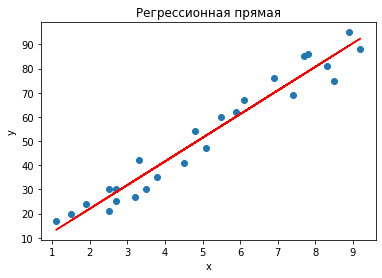

In [29]:
# Отрисовка линии
regression_line = [a + b * x for x in x_data]
plt.plot(x_data, regression_line, color="red")

# Повторное отображение точек
plt.scatter(x_data, y_data)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Регрессионная прямая")
plt.show()

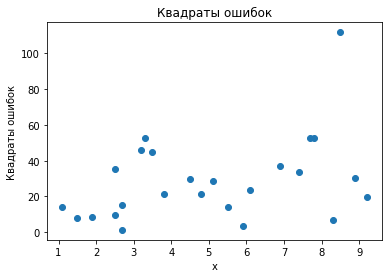

In [17]:
# Вычисление квадратов ошибок
residuals = [(y - (a + b * x)) ** 2 for y, x in zip(y_data, x_data)]

# Отрисовка квадратов ошибок
plt.scatter(x_data, residuals)
plt.xlabel("x")
plt.ylabel("Квадраты ошибок")
plt.title("Квадраты ошибок")
plt.show()

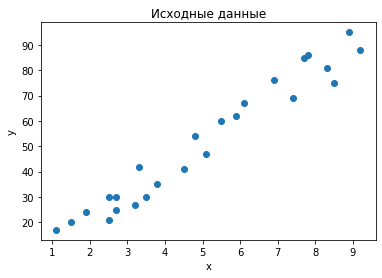

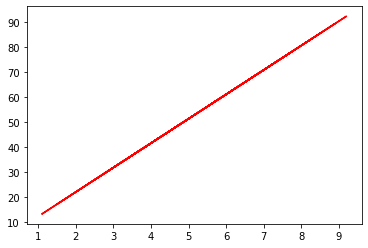

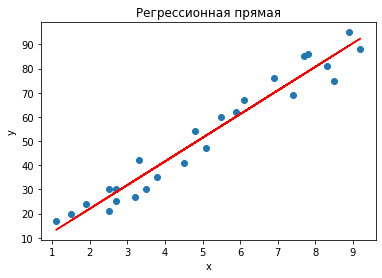

In [41]:
#Отображение 3 изображений одновременно:
plt.scatter(x_data, y_data)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Исходные данные")
plt.show()
regression_line = [a + b * x for x in x_data]
plt.plot(x_data, regression_line, color="red")
plt.show()
regression_line = [a + b * x for x in x_data]
plt.plot(x_data, regression_line, color="red")
plt.scatter(x_data, y_data)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Регрессионная прямая")
plt.show()